In [ ]:
#mount drive
#import drive
from google.colab import drive
drive.mount('/content/drive')

#import data
emtrainpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/embeddings_train_xml.npy'
emtestpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/embeddings_test_xml.npy'
ytrainpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/y_train_llm.csv'
ytestpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/y_test_llm.csv'

#import libraries
import numpy as np
import pandas as pd

embeddings_train = np.load(emtrainpath)
embeddings_train = embeddings_train.tolist()
embeddings_test = np.load(emtestpath)
embeddings_test = embeddings_test.tolist()
y_train_llm = pd.read_csv(ytrainpath)
y_test_llm = pd.read_csv(ytestpath)

print('train_embeddings:', len(embeddings_train))
print('test_embeddings:', len(embeddings_test))
print('y_train_llm:', y_train_llm.shape)
print('y_test_llm:', y_test_llm.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train_embeddings: 1222641
test_embeddings: 523989
y_train_llm: (1222641, 2)
y_test_llm: (523989, 2)


In [ ]:
y_train_llm = y_train_llm.iloc[:, 1]
y_test_llm = y_test_llm.iloc[:, 1]

print('y_train_llm:', y_train_llm.shape)
print('y_test_llm:', y_test_llm.shape)

y_train_llm: (1222641,)
y_test_llm: (523989,)


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns #for plots
#our models and ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm  # Import tqdm for notebook usage

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()

models = [rfc, abc, gbc, etc, lr, knn]
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']

def predicting_anomaly(X_train, X_test, y_train, y_test, models, names): #define prediction function
  display(HTML('<h1>Predicting Anomaly</h1>')) #display HTML

  def training(model, name, axes): #define training function
    model.fit(X_train, y_train) #fit the model
    pred = model.predict(X_test) #predict the values
    score = accuracy_score(y_test, pred) #obtain score
    report = classification_report(y_test, pred) #obtain report
    cm = confusion_matrix(y_test, pred) #obtain CM
    sns.heatmap(cm, annot=True, ax=axes) #optain heatmap
    axes.set_title("{}: {}%".format(name, round(score*100, 2))) #display formatting
    return score*100, report #returned results

  display(HTML('<h1>Training and evaluation of Network Traffic Binary Prediction</h1>')) #display HTML

  #create plots
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7)) #create plots
  index = 0
  scores, reports = [], dict()
  for i in tqdm(range(2), desc="Row Progress"):
        for j in tqdm(range(3), desc="Column Progress", leave=False):
            print("Current Model: ", names[index])
            score, report = training(models[index], names[index], axes[i][j])
            print("Scoore: ", score)
            reports[names[index]] = report
            index += 1
            scores += [score]
  plt.tight_layout()
  plt.show()

  dt = pd.DataFrame({"scores": scores}, index=names)
  dt = dt.sort_values("scores", ascending=False)
  dt["scores"] = round(dt["scores"], 2)
  fig, axes = plt.subplots()
  sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
  for container in axes.containers:
      axes.bar_label(container)
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
  axes.set_xlabel("Model Names")
  axes.set_title("Model Accuracy")
  plt.show()

  for i in dt.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

Row Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Random Forest
Scoore:  99.73625400533217
Current Model:  AdaBoost
Scoore:  99.03414002965711
Current Model:  Gradient Boost
Scoore:  99.29922193023137


Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Extra Trees
Scoore:  99.74484197187346
Current Model:  Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scoore:  99.27212212470108
Current Model:  KNN
Scoore:  99.83606526091197


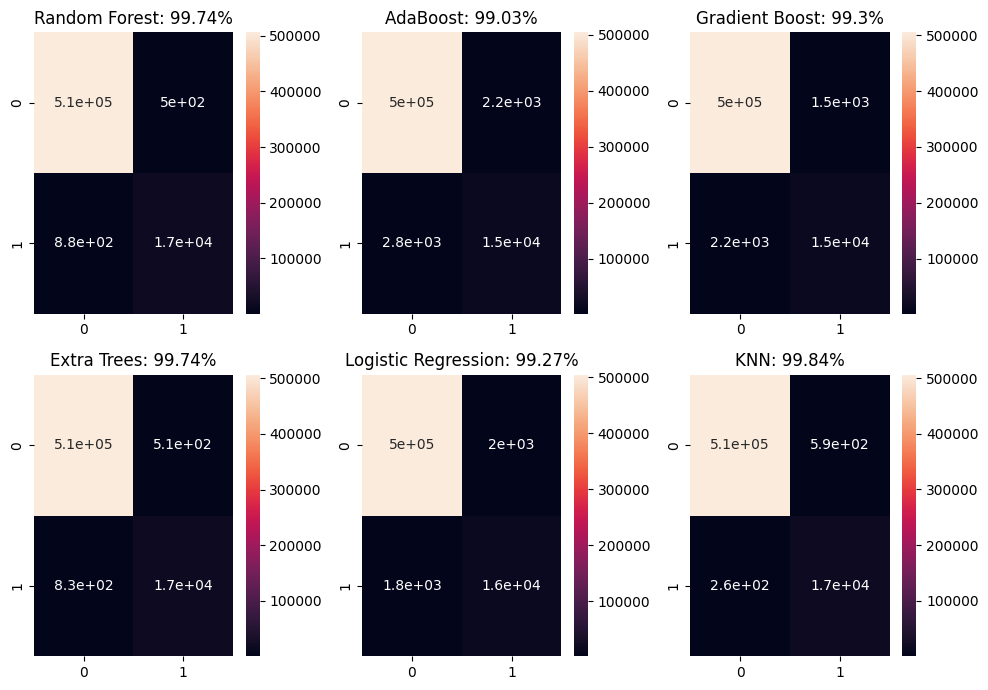

<ipython-input-3-3e998ff1a402>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


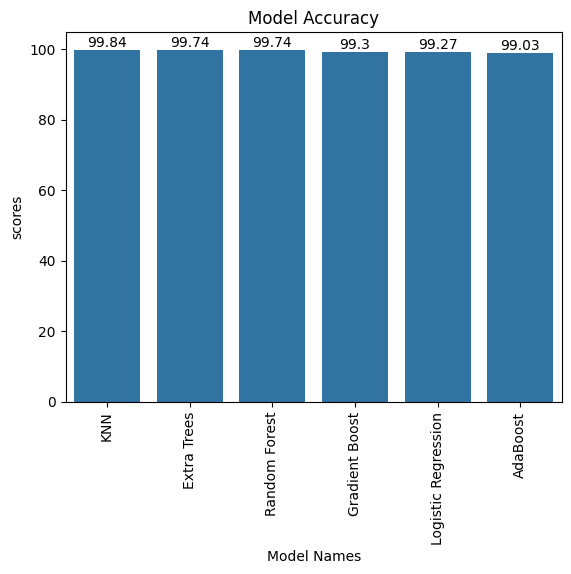

******************************
KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506436
           1       0.97      0.98      0.98     17553

    accuracy                           1.00    523989
   macro avg       0.98      0.99      0.99    523989
weighted avg       1.00      1.00      1.00    523989




******************************
Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506436
           1       0.97      0.95      0.96     17553

    accuracy                           1.00    523989
   macro avg       0.98      0.98      0.98    523989
weighted avg       1.00      1.00      1.00    523989




******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506436
           1       0.97      0.95      0.96     17553

    accuracy                           1.00    523989

In [ ]:
predicting_anomaly(embeddings_train, embeddings_test, y_train_llm, y_test_llm, models, model_names)

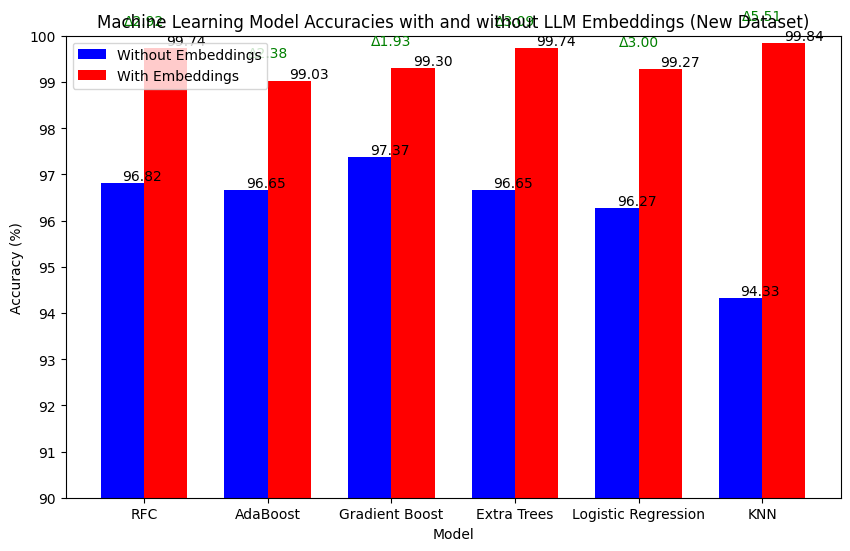

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model = ['RFC', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']
without_embeddings = [96.82, 96.65, 97.37, 96.65, 96.27, 94.33]
with_embeddings = [99.74, 99.03, 99.30, 99.74, 99.27, 99.84]
accuracy_change = np.subtract(with_embeddings, without_embeddings)  # Calculate change in accuracy

# Plot configuration
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bar_width = 0.35
index = np.arange(len(model))

bars1 = ax.bar(index, without_embeddings, bar_width, label='Without Embeddings', color='b')
bars2 = ax.bar(index + bar_width, with_embeddings, bar_width, label='With Embeddings', color='r')

# Displaying exact accuracy scores and changes on the chart
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # Va: vertical alignment

for i, change in enumerate(accuracy_change):
    ax.text(i + bar_width/2, with_embeddings[i] + 0.5, f'Δ{change:.2f}', ha='center', color='green')

# Adjusting Y-axis limits and ticks
ax.set_ylim(90, 100)  # Set the new y-axis limits
ax.set_yticks(np.arange(90, 101, 1))  # Detailed steps from 90.0 to 100.0

# Formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Machine Learning Model Accuracies with and without LLM Embeddings (New Dataset)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model)
ax.legend()

plt.show()


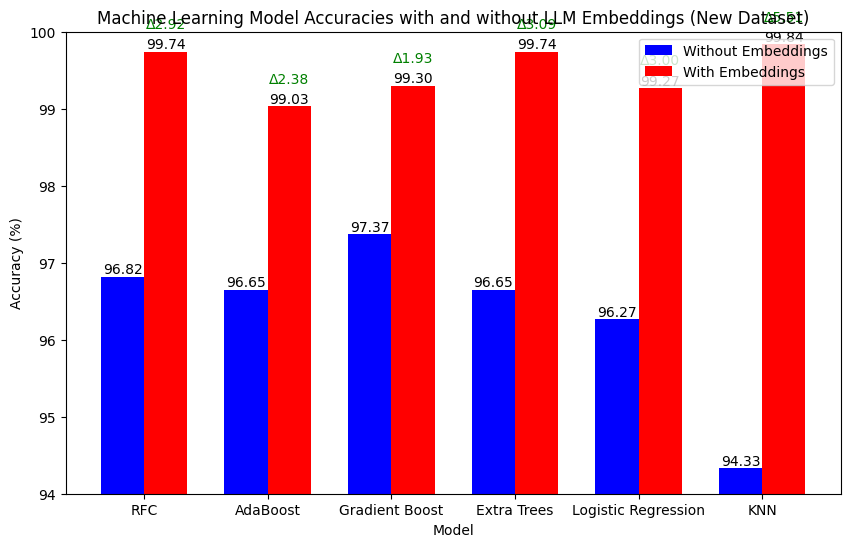

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model = ['RFC', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']
without_embeddings = [96.82, 96.65, 97.37, 96.65, 96.27, 94.33]
with_embeddings = [99.74, 99.03, 99.30, 99.74, 99.27, 99.84]
accuracy_change = np.subtract(with_embeddings, without_embeddings)  # Calculate change in accuracy

# Plot configuration
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bar_width = 0.35
index = np.arange(len(model))

bars1 = ax.bar(index, without_embeddings, bar_width, label='Without Embeddings', color='b')
bars2 = ax.bar(index + bar_width, with_embeddings, bar_width, label='With Embeddings', color='r')

# Displaying exact accuracy scores and changes on the chart
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.2f}', va='bottom', ha='center')  # Va: vertical alignment, Ha: horizontal alignment

for i, change in enumerate(accuracy_change):
    ax.text(i + bar_width, with_embeddings[i] + 0.3, f'Δ{change:.2f}', ha='center', color='green')  # Center the text above the bars

# Adjusting Y-axis limits and ticks
ax.set_ylim(94, 100)  # Set the new y-axis limits
ax.set_yticks(np.arange(94, 101, 1))  # Detailed steps from 94.0 to 100.0

# Formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Machine Learning Model Accuracies with and without LLM Embeddings (New Dataset)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model)
ax.legend()

plt.show()


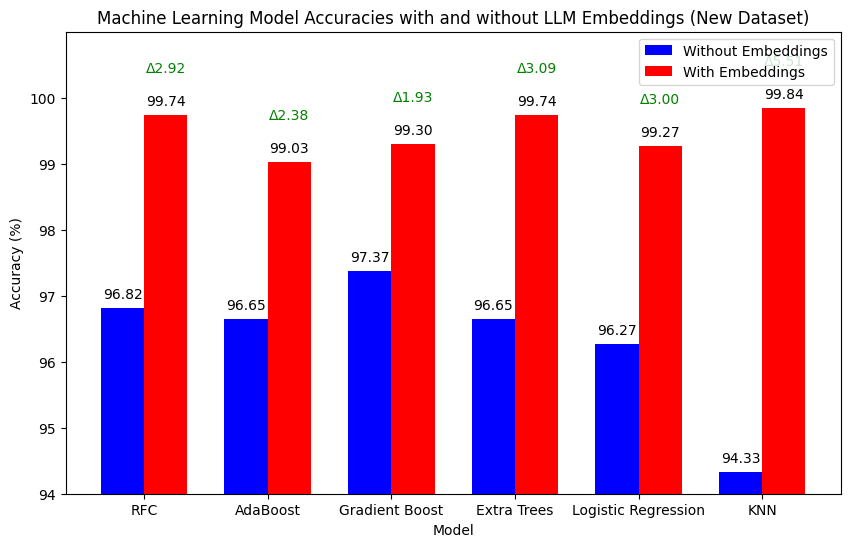

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
model = ['RFC', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']
without_embeddings = [96.82, 96.65, 97.37, 96.65, 96.27, 94.33]
with_embeddings = [99.74, 99.03, 99.30, 99.74, 99.27, 99.84]
accuracy_change = np.subtract(with_embeddings, without_embeddings)  # Calculate change in accuracy

# Plot configuration
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bar_width = 0.35
index = np.arange(len(model))

bars1 = ax.bar(index, without_embeddings, bar_width, label='Without Embeddings', color='b')
bars2 = ax.bar(index + bar_width, with_embeddings, bar_width, label='With Embeddings', color='r')

# Displaying exact accuracy scores and changes on the chart
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.1, f'{yval:.2f}', va='bottom', ha='center')  # Va: vertical alignment, Ha: horizontal alignment

for i, change in enumerate(accuracy_change):
    ax.text(i + bar_width, with_embeddings[i] + 0.6, f'Δ{change:.2f}', ha='center', va='bottom', color='green')  # Adjust the text position

# Adjusting Y-axis limits and ticks
ax.set_ylim(94, 101)  # Set the new y-axis limits slightly above the max value
ax.set_yticks(np.arange(94, 101, 1))  # Detailed steps from 94.0 to 100.0

# Formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Machine Learning Model Accuracies with and without LLM Embeddings (New Dataset)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model)
ax.legend()

plt.show()
